<a href="https://colab.research.google.com/github/Anvariddin/android-loyiha1/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification with neural networks

Neural networks are adept at fitting non-linear datasets. To demonstrate, we'll fit a binary classifier to a two-class dataset generated with Scikit's [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) function. Start by creating the dataset and plotting it. In the plot, purple corresponds to class 0 (the negative class) and red corresponds to class 1 (the positive class).

<ipython-input-1-271b18d8373e>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(x[:, 0], x[:, 1], c=y, s=300, cmap=plt.cm.get_cmap('rainbow', 2), alpha=0.5)


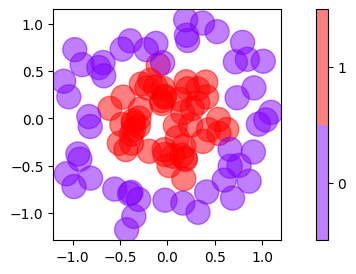

In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

x, y = make_circles(100, factor=0.4, noise=0.15, random_state=1)
plt.figure(figsize=(9, 3))
plt.axes().set_aspect('equal')
plt.scatter(x[:, 0], x[:, 1], c=y, s=300, cmap=plt.cm.get_cmap('rainbow', 2), alpha=0.5)
plt.colorbar(ticks=range(2))
plt.clim(-0.5, 1.5)

Define a simple neural network (a multilayer perceptron) with a single hidden layer. Since this network is intended to perform binary classification, include an output layer that contains one neuron and uses the [sigmoid](https://keras.io/api/layers/activations/#sigmoid-function) activation function, and specify [binary_crossentropy](https://keras.io/api/losses/probabilistic_losses/#binary_crossentropy-function) as the loss function.

In [2]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

Train the network. Use a small batch size since there are only 100 samples in the dataset.

In [3]:
hist = model.fit(x, y, validation_split=0.2, epochs=40, batch_size=10)

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5150 - loss: 0.6868 - val_accuracy: 0.6500 - val_loss: 0.6536
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4806 - loss: 0.6861 - val_accuracy: 0.6500 - val_loss: 0.6463
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5776 - loss: 0.6735 - val_accuracy: 0.7000 - val_loss: 0.6385
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5210 - loss: 0.6717 - val_accuracy: 0.7000 - val_loss: 0.6334
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6112 - loss: 0.6590 - val_accuracy: 0.7000 - val_loss: 0.6253
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6046 - loss: 0.6551 - val_accuracy: 0.7000 - val_loss: 0.6199
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6371 - loss: 0.6511 - val_accuracy: 0.7500 - val_loss: 0.6146
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6557 - loss: 0.6453 - val_accuracy: 0.8000 - val_loss: 0.6106
Epoc

Plot the training and validation accuracy.

[]

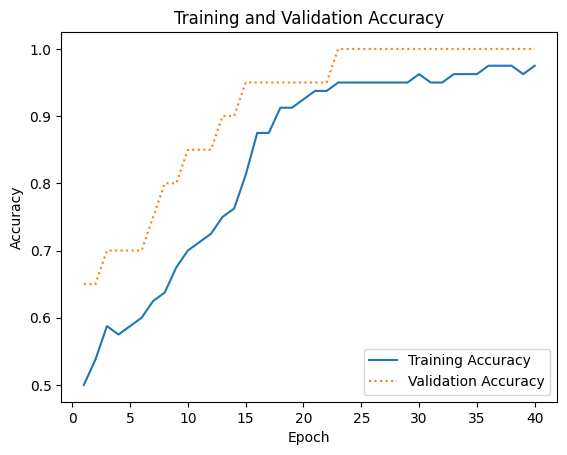

In [4]:
err = hist.history['accuracy']
val_err = hist.history['val_accuracy']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training Accuracy')
plt.plot(epochs, val_err, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Predict the probability that a point that lies at (-0.5, 0.0) belongs to the positive class (red).

In [ ]:
model.predict(np.array([[-0.5, 0.0]]))[0][0]

0.5906321

Predict which class a point that lies at (-0.5, 0.0) belongs to.

In [ ]:
(model.predict(np.array([[-0.5, 0.0]])) > 0.5).astype('int32')[0][0]

1

Predict the probability that a point that lies at (0.6, 0.6) belongs to the positive class (red).

In [ ]:
model.predict(np.array([[0.6, 0.6]]))[0][0]

0.4519902

Predict which class a point that lies at (0.6, 0.6) belongs to.

In [ ]:
(model.predict(np.array([[0.6, 0.6]])) > 0.5).astype('int32')[0][0]

0